# Prescriptor robojudge
Notebook for evaluating prescriptions using standard predictor.

The main metric computed is based on how many other prescriptions
each submission dominates on the pareto front of stringency vs cases.

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from covid_xprize.standard_predictor.xprize_predictor import NPI_COLUMNS
from covid_xprize.scoring.prescriptor_scoring import weight_prescriptions_by_cost
from covid_xprize.scoring.prescriptor_scoring import generate_cases_and_stringency_for_prescriptions
from covid_xprize.scoring.prescriptor_scoring import compute_domination_df
from covid_xprize.scoring.prescriptor_scoring import compute_pareto_set
from covid_xprize.validation.prescriptor_validation import validate_submission

In [ ]:
# Can set these longer for better evaluation. Will increase eval time
START_DATE = "2021-01-01"
END_DATE = "2021-02-28"

# Prepare Historical IP Data

In [ ]:
from covid_xprize.scoring.predictor_scoring import load_dataset
from covid_xprize.validation.scenario_generator import generate_scenario

LATEST_DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
GEO_FILE = "countries_regions.csv"

latest_df = load_dataset(LATEST_DATA_URL, GEO_FILE)

In [ ]:
latest_df.tail()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
110990,Zimbabwe,ZWE,,NaN,NAT_TOTAL,2021-01-25,NaN,NaN,NaN,NaN,...,NaN,87.04,NaN,91.67,NaN,67.78,NaN,74.36,NaN,25.0
110991,Zimbabwe,ZWE,,NaN,NAT_TOTAL,2021-01-26,NaN,NaN,NaN,NaN,...,NaN,87.04,NaN,91.67,NaN,67.78,NaN,74.36,NaN,25.0
110992,Zimbabwe,ZWE,,NaN,NAT_TOTAL,2021-01-27,NaN,NaN,NaN,NaN,...,NaN,87.04,NaN,91.67,NaN,67.78,NaN,74.36,NaN,25.0
110993,Zimbabwe,ZWE,,NaN,NAT_TOTAL,2021-01-28,NaN,NaN,NaN,NaN,...,NaN,87.04,NaN,91.67,NaN,67.78,NaN,74.36,NaN,25.0
110994,Zimbabwe,ZWE,,NaN,NAT_TOTAL,2021-01-29,NaN,NaN,NaN,NaN,...,NaN,87.04,NaN,91.67,NaN,67.78,NaN,74.36,NaN,25.0


In [ ]:
IP_FILE = 'prescriptions/robojudge_test_scenario.csv'

In [ ]:
countries = None
scenario_df = generate_scenario(START_DATE, END_DATE, latest_df, countries, scenario="Freeze")
scenario_df.to_csv(IP_FILE, index=False)

# Generate some prescriptions

In [ ]:
# Generate blind_greedy prescriptions
output_file = "../nixtamal_covid_prescribers/blind_greedy.csv"
!python ../covid-xprize-orig/covid_xprize/examples/prescriptors/blind_greedy/prescribe.py -s {START_DATE} \
                                                                     -e {END_DATE} \
                                                                     -ip {IP_FILE} \
                                                                     -c {TEST_COST} \
                                                                     -o {output_file}

Generating prescriptions from {START_DATE} to {END_DATE}...
Traceback (most recent call last):
  File "../covid-xprize-orig/covid_xprize/examples/prescriptors/blind_greedy/prescribe.py", line 147, in <module>
    prescribe(args.start_date, args.end_date, args.prev_file, args.cost_file, args.output_file)
  File "../covid-xprize-orig/covid_xprize/examples/prescriptors/blind_greedy/prescribe.py", line 57, in prescribe
    error_bad_lines=True)
  File "/Users/RaulSierra/opt/miniconda3/envs/covid-xprize/lib/python3.7/site-packages/pandas/io/parsers.py", line 686, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/Users/RaulSierra/opt/miniconda3/envs/covid-xprize/lib/python3.7/site-packages/pandas/io/parsers.py", line 452, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/Users/RaulSierra/opt/miniconda3/envs/covid-xprize/lib/python3.7/site-packages/pandas/io/parsers.py", line 936, in __init__
    self._make_engine(self.engine)
  File "/Users/RaulSierra/opt/minicon

In [ ]:
# Generate blind_greedy prescriptions
idio_output_file = "../nixtamal_covid_prescribers/idio_blind_greedy.csv"
!python ../covid-xprize-orig/covid_xprize/examples/prescriptors/idiosyncratic_blind_greedy/prescribe.py -s {START_DATE} \
                                                                     -e {END_DATE} \
                                                                     -ip {IP_FILE} \
                                                                     -c {TEST_COST} \
                                                                     -o {idio_output_file}

Generating prescriptions from 2021-01-01 to 2021-02-28...
Done!


In [ ]:
prescription_files = {
#     'NeatExample': 'covid_xprize/examples/prescriptors/neat/test_prescriptions/pres.csv',
#    'Random1': 'covid_xprize/examples/prescriptors/random/prescriptions/random_presc_1.csv',
#    'Random2': 'covid_xprize/examples/prescriptors/random/prescriptions/random_presc_2.csv',
    'BlindGreedy': 'covid_xprize/examples/prescriptors/blind_greedy/prescriptions/blind_greedy.csv',
    'IdioBlindGreedy': idio_output_file
}

In [ ]:
# Validate the prescription files
for prescriptor_name, output_file in prescription_files.items():
    errors = validate_submission(START_DATE, END_DATE, IP_FILE, output_file)
    if errors:
        for error in errors:
            print(f"{prescriptor_name}: {error}")
    else:
        print(f"{prescriptor_name}: All good!")

Random1: All good!
Random2: All good!
BlindGreedy: All good!
IdioBlindGreedy: All good!


# Evaluate them

In [ ]:
# Collect case and stringency data for all prescriptors
dfs = []
for prescriptor_name, prescription_file in sorted(prescription_files.items()):
    print("Generating predictions for", prescriptor_name)
    df, _ = generate_cases_and_stringency_for_prescriptions(START_DATE, END_DATE, prescription_file, TEST_COST)
    df['PrescriptorName'] = prescriptor_name
    dfs.append(df)
    

In [ ]:
df = pd.concat(dfs)

NameError: name 'dfs' is not defined

In [ ]:
df[df['CountryName'] == 'Afghanistan']

NameError: name 'df' is not defined

In [ ]:
ddf = compute_domination_df(df)

Computing domination for Afghanistan nan
Computing domination for Albania nan
Computing domination for Algeria nan
Computing domination for Andorra nan
Computing domination for Angola nan
Computing domination for Argentina nan
Computing domination for Aruba nan
Computing domination for Australia nan
Computing domination for Austria nan
Computing domination for Azerbaijan nan
Computing domination for Bahamas nan
Computing domination for Bahrain nan
Computing domination for Bangladesh nan
Computing domination for Barbados nan
Computing domination for Belarus nan
Computing domination for Belgium nan
Computing domination for Belize nan
Computing domination for Benin nan
Computing domination for Bermuda nan
Computing domination for Bhutan nan
Computing domination for Bolivia nan
Computing domination for Bosnia and Herzegovina nan
Computing domination for Botswana nan
Computing domination for Brazil nan
Computing domination for Brunei nan
Computing domination for Bulgaria nan
Computing domin

Computing domination for United States New York
Computing domination for United States North Carolina
Computing domination for United States North Dakota
Computing domination for United States Ohio
Computing domination for United States Oklahoma
Computing domination for United States Oregon
Computing domination for United States Pennsylvania
Computing domination for United States Rhode Island
Computing domination for United States South Carolina
Computing domination for United States South Dakota
Computing domination for United States Tennessee
Computing domination for United States Texas
Computing domination for United States Utah
Computing domination for United States Vermont
Computing domination for United States Virgin Islands
Computing domination for United States Virginia
Computing domination for United States Washington
Computing domination for United States Washington DC
Computing domination for United States West Virginia
Computing domination for United States Wisconsin
Comput

In [ ]:
# Get number of dominated prescriptions for each submission. This is the "Domination Count"
ddf.groupby('DominatingName').count().sort_values('DominatedIndex', ascending=False)['DominatedIndex']

Series([], Name: DominatedIndex, dtype: int64)

In [ ]:
def plot_pareto_curve(objective1_list, objective2_list):
    """
    Plot the pareto curve given the objective values for a set of solutions.
    This curve indicates the area dominated by the solution set, i.e., 
    every point up and to the right is dominated.
    """
    
    # Compute pareto set from full solution set.
    objective1_pareto, objective2_pareto = compute_pareto_set(objective1_list, 
                                                              objective2_list)
    
    # Sort by first objective.
    objective1_pareto, objective2_pareto = list(zip(*sorted(zip(objective1_pareto,
                                                                objective2_pareto))))
    
    # Compute the coordinates to plot.
    xs = []
    ys = []
    
    xs.append(objective1_pareto[0])
    ys.append(objective2_pareto[0])
    
    for i in range(0, len(objective1_pareto)-1):
        
        # Add intermediate point between successive solutions
        xs.append(objective1_pareto[i+1])
        ys.append(objective2_pareto[i])
        
        # Add next solution on front
        xs.append(objective1_pareto[i+1])
        ys.append(objective2_pareto[i+1])
        
    plt.plot(xs, ys)

In [ ]:
# Plot overall stringency and cases of each prescription
plt.figure(figsize=(10,8))
for prescriptor_name in prescription_files:
    pdf = df[df['PrescriptorName'] == prescriptor_name]
    overall_pdf = pdf.groupby('PrescriptionIndex').mean().reset_index()
    plt.scatter(overall_pdf['Stringency'],
                overall_pdf['PredictedDailyNewCases'], 
                label=prescriptor_name)
    plot_pareto_curve(list(overall_pdf['Stringency']),
                      list(overall_pdf['PredictedDailyNewCases']))
plt.xlabel('Mean stringency')
plt.ylabel('Mean cases per day per geo')
plt.legend()
plt.show()

NameError: name 'prescription_files' is not defined

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Stringency'>

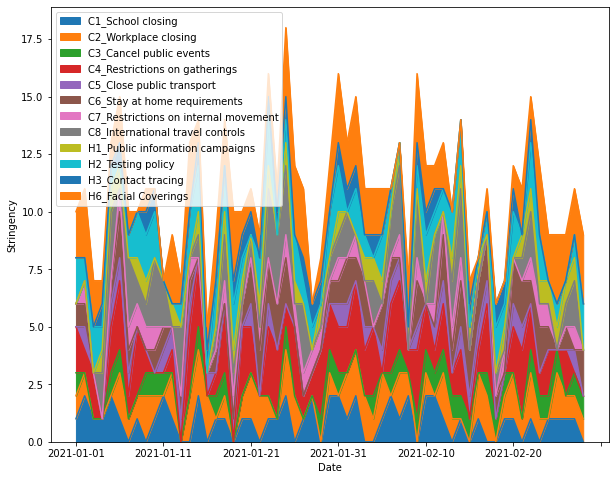

In [ ]:
# Plot stacked line chart of npis over time for a prescription for a particular geo

#submission_file = 'covid_xprize.examples/prescriptors/neat/test_prescriptions/pres.csv'
submission_file = 'covid_xprize/examples/prescriptors/random/prescriptions/random_presc_1.csv'

prescription_index = 2
country_name = 'United States'
region_name = None

pdf = pd.read_csv(submission_file)
gdf = pdf[(pdf['PrescriptionIndex'] == prescription_index) &
          (pdf['CountryName'] == country_name) &
          (pdf['RegionName'].isna() if region_name is None else (pdf['RegionName'] == 'region_name'))]
gdf.plot.area(x='Date', y=NPI_COLUMNS, figsize=(10,8), ylabel='Stringency')

In [ ]:
# Plot stringency and cases of each prescription for a particular country
country_name = 'United States'
cdf = df[df.CountryName == country_name]

plt.figure(figsize=(10,8))
for prescriptor_name in prescription_files:
    pdf = cdf[cdf['PrescriptorName'] == prescriptor_name]
    #overall_pdf = pdf.groupby('PrescriptionIndex').mean().reset_index()
    plt.scatter(pdf['Stringency'],
                pdf['PredictedDailyNewCases'], 
                label=prescriptor_name)
    plot_pareto_curve(list(pdf['Stringency']),
                      list(pdf['PredictedDailyNewCases']))
plt.xlabel('Mean stringency')
plt.ylabel('Mean cases per day per geo')
plt.title(country_name)
plt.legend()
plt.show()

NameError: name 'df' is not defined